# Long-distance runner performance over ten year

1. import libraries and 10 csv files about performances
2. merge performances
3. import and merge years of birth of runners
4. time conversion
5. add columns: evolution ratio, sudden drop, age (by dizens)
6. two runners made all 10 races
7. correlation age / sudden drop?
8. people of four ages (with the most represented years of birth)
9. four age groups (18-29, 30-39, 40-49, 50-59)
10. Twelve most regular runners and their evolution, sorted from the better to the worst evolution

In [1]:
#
#    1. import libraries and files about performances
#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
from IPython.display import display
matplotlib.rcParams['pdf.fonttype'] = 42

In [11]:
selcols = ['nom', 'temps net']

df_list = []
years = range(2006, 2016)
for year in years:
    print('Loading year {}…'.format(year))
    df_list.append(pd.read_csv('runners_{}.csv'.format(year), usecols=selcols))
    print('Shape: {}'.format(df_list[-1].shape))

Loading year 2006…
Shape: (601, 2)
Loading year 2007…
Shape: (305, 2)
Loading year 2008…
Shape: (526, 2)
Loading year 2009…
Shape: (522, 2)
Loading year 2010…
Shape: (223, 2)
Loading year 2011…
Shape: (532, 2)
Loading year 2012…
Shape: (345, 2)
Loading year 2013…
Shape: (367, 2)
Loading year 2014…
Shape: (367, 2)
Loading year 2015…
Shape: (367, 2)


In [12]:
#
#    2. merge performances
#

df = df_list[0]
c = 0
for item in df_list[1:]:
    #df = merge_years(df, item)
    df = df.merge(item, on='nom', how='outer', suffixes=('_{}'.format(years[c]), '_{}'.format(years[c+1])))
    print('Merge done, new shape:', df.shape)
    display(df.head())
    c += 1
    
df

Merge done, new shape: (740, 3)


,nom,temps net_2006,temps net_2007
0,Kogo Micah,"19.58,2",NaN
1,Weidlinger Guenther,"19.58,4","20.21,6"
2,Chengere Tolossa,"20.21,5","20.16,9"
3,Wyatt Jonathan,"20.31,4",NaN
4,Belz Christian,"20.38,7",NaN


Merge done, new shape: (956, 4)


,nom,temps net_2006,temps net_2007,temps net
0,Kogo Micah,"19.58,2",NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2"
3,Wyatt Jonathan,"20.31,4",NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN


Merge done, new shape: (1149, 5)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009
0,Kogo Micah,"19.58,2",NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6"
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN


Merge done, new shape: (1233, 6)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2"
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN


Merge done, new shape: (1497, 7)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN


Merge done, new shape: (1610, 8)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN,NaN
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN,NaN


Merge done, new shape: (1763, 9)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN,NaN,NaN
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merge done, new shape: (1903, 10)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013,temps net
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN,NaN,NaN,"21.53,9"
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merge done, new shape: (2035, 11)


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013,temps net_2014,temps net_2015
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN,NaN,NaN,"21.53,9","21.23,3"
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013,temps net_2014,temps net_2015
0,Kogo Micah,"19.58,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Weidlinger Guenther,"19.58,4","20.21,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chengere Tolossa,"20.21,5","20.16,9","20.36,2","20.57,6","20.05,2",NaN,NaN,NaN,"21.53,9","21.23,3"
3,Wyatt Jonathan,"20.31,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belz Christian,"20.38,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Lemma Kleyessa Fedaku,"20.40,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Baaru Philemon,"20.44,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wayessa Urguessa,"20.53,6","21.05,9","21.01,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Eticha Tesfaye,"20.58,1","21.16,1","21.09,3","21.48,6",NaN,"22.28,0",NaN,NaN,NaN,NaN
9,Keitany Elijah,"20.58,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#
#    3. import and merge years of birth
#

df_years_15 = pd.read_csv('Data_ages_2015.csv', usecols=['catégorie', 'nom', 'année'])
df_years_14 = pd.read_csv('Data_ages_2014.csv', usecols=['catégorie', 'nom', 'année'])
df_years = df_years_15.append(df_years_14)
df_years = df_years.drop_duplicates(subset='nom')
print('Birth years collected, {} duplicates dropped.'.format(827-len(df_years)))

Birth years collected, 158 duplicates dropped.


In [489]:
df = df.merge(df_years, on='nom', how='outer')

In [47]:
#
#    4. time conversion
#

#m.ss,c -> (m / 60) + ss,c

from datetime import timedelta
from math import nan

# works well, but ugly for the y axis ticks
def timeToSeconds(value):
    if not isinstance(value, str):
        return value
    try:
        minutes, seconds = value.split('.')
        return (int(minutes) * 60) + float(str.replace(seconds, ',', ''))
    except:
        return None

# doesn't work well
def stringToTime(value):
    if not isinstance(value, str):
        return value
    try:
        _minutes, _seconds = value.split('.')
        return timedelta(minutes=int(_minutes), seconds=float(str.replace(_seconds, ',', '')))
    except:
        return nan
    
for i in range(2006, 2016):
    df['temps s{}'.format(i)] = df['temps net_{}'.format(i)].apply(timeToSeconds)

In [493]:
#
#    5. add other columns: nan values, evolution ratio, sudden drop, age (by dizens)
#

df['nan_values'] = df.nan_values

In [ ]:
# waste of time (but, finally.... it worked)
columns = ['temps s{}'.format(i) for i in range(2006, 2016)]

def evolution_ratio(row):
    # we get all float time values -- except the nan ones
    times = [row[i] for i in columns]
    times = [i for i in times if i == i]
    
    if len(times) > 1:
        # return last year - first year
        return times[-1] - times[0]
    else:
        return nan
    
df['time_evolution'] = df.apply(evolution_ratio, axis=1)
df

In [ ]:
def get_sudden_drop(row):
    times = [i for i in row if isinstance(i, float)]
    time_keys = [y for y in row.keys() if isinstance(row[y], float)]
    
    sudden_drops = {}
    
    if len(times[:-1]) > 1:
        lasttime = None
        for item, key in zip(times[:-1], time_keys[:-1]):
            if key in ('time_evolution', 'sudden_drop_key', 'année'):
                continue
            if not lasttime: # first item
                if item == item:
                    lasttime = item
            else:
                if (item == item):
                    if (item - lasttime) < -100:# -480: == 8 minutes, too much
                        sudden_drops[key] = item - lasttime
#                        print("Big gap here!", row['nom'], key, item - lasttime)
                    lasttime = item
    if len(sudden_drops) > 0:
        drop_key = max(sudden_drops, key=sudden_drops.get)
        return int(drop_key[-4:])
    else:
        return nan
    
# 480 seconds = 8 minutes
df['sudden_drop_key'] = df.apply(get_sudden_drop, axis=1)

In [490]:
from math import floor
def add_age(value):
    if value == value:
        age = 2015 - value
        if age < 20:
            return 20
        return floor(age/10)*10
    else:
        return nan
    

df['age_10'] = df['année'].apply(add_age)
df['age_10'].value_counts()

30.0    245
20.0    217
40.0    176
50.0     31
Name: age_10, dtype: int64

In [60]:
#
#    6. two runners made all 10 races
#

df_most_regulars = df[df['time_rows']>9]
df_most_regulars

,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013,temps net_2014,temps net_2015,time_rows,Birth
68,Dutoit Thierry,1837.0,1836.0,1887.0,1543.0,1909.0,1708.0,1812.0,1524.0,1800.0,1767.0,10,1978
199,Gattone Sylvain,1860.0,1686.0,1614.0,1588.0,1929.0,2015.0,1859.0,1679.0,1857.0,1904.0,10,1976


['2006 -28', '2007 -29', '2008 -30', '2009 -31', '2010 -32', '2011 -33', '2012 -34', '2013 -35', '2014 -36', '2015 -37']


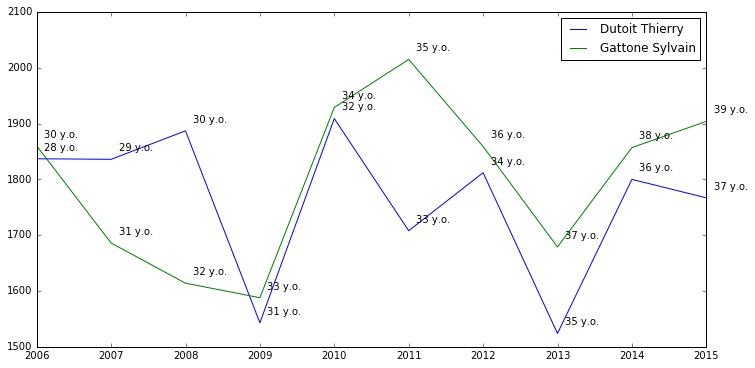

In [66]:
# Dutoit: 1978
# Gattone: 1976

counter = 0
columns = ['temps net_{}'.format(i) for i in range(2006, 2016)]
xticklabels = ['{} {}'.format(i, 1978-i) for i in years]
print(xticklabels)
fig, ax = plt.subplots(figsize=(12,6))

for idx, runner in df_most_regulars.iterrows():
    runner[columns].plot(label=runner['nom'])

    values = runner[columns].tolist()

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels(range(2006, 2016))
    ax.legend(loc='upper right')
    

    for x, y, year in zip(range(0, 10), values, years):
        ax.text(x+.1, y+15, "{} y.o.".format(year-runner['année']))
    
plt.savefig('two_most_regulars.pdf')

In [302]:
#
#    7. correlation age / sudden drop?
#

df[df['nan_values'] < 6].corr()['année']['sudden_drop_key']

0.69837990215532952

In [ ]:
df_6 = df[df['nan_values'] < 6]

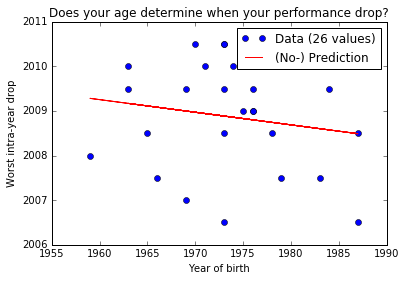

In [453]:
lm = smf.ols(formula="sudden_drop_key~année",data=df_6).fit()
fig, ax = plt.subplots()

ax.plot(df_6['année'], df_6['sudden_drop_key'], 'o', label="Data (26 values)")
ax.plot(df_6['année'], lm.fittedvalues, '-', color='red', label="(No-) Prediction")
#ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticklabels([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

ax.legend(loc="best");
ax.set_ylim([2006, 2016])
ax.set_title('Does your age determine when your performance drop?')
ax.set_ylabel('Worst intra-year drop')
ax.set_xlabel('Year of birth')
plt.savefig('Prediction.pdf')

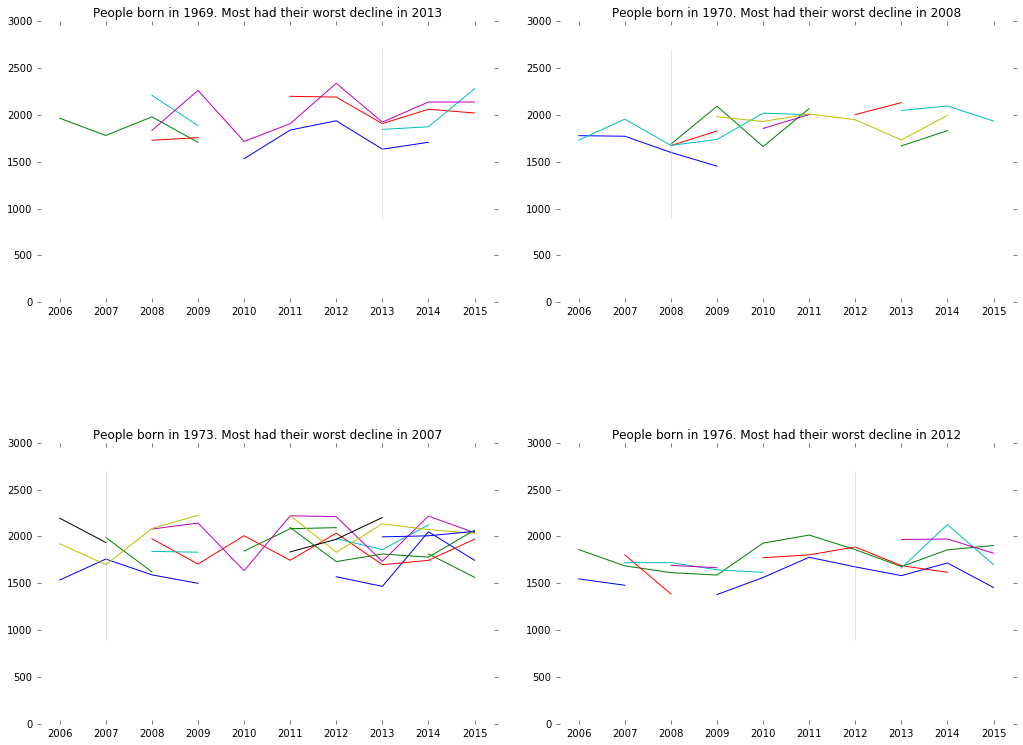

In [377]:
#
#    8. people of four ages (with the most represented years of birth)
#

nrows = 2; ncols = 2
num_plots = nrows * ncols  # number of subplots
columns = ['temps s{}'.format(i) for i in range(2006, 2016)]

fig = plt.figure(figsize=(14, 10))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)

colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC', 'red', 'orange', 'green', 'violet']

count = 0

for age_10, group in df[df['nan_values'] < 10].groupby('année'):
    if len(group) < 5:
        continue
        
    ax = axes[count]

    for idx, runner in group.iterrows():
        ax.plot(runner[columns].tolist())
    
    drop_sentence = ''
    drop_mode = group['sudden_drop_key'].mode()
    if len(drop_mode > 0):
        drop_year = drop_mode[0]
        drop_sentence = '. Most had their worst decline in ' + str(int(drop_year))
        drop_x_tick = drop_year - 2006
        ax.axvline(x=drop_x_tick, ymin=0.3, ymax = 0.9, linewidth=.5, color='#cacaca')

#        ax.plot([drop_x_tick, 0], [drop_x_tick, 3000], color='k', linestyle='-', linewidth=2)
    
    ax.set_title("People born in {}{}".format(int(age_10), drop_sentence))

    ax.set_xlim([-.5, 9.5])
    ax.set_ylim([0, 3000])

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
        


    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
    count += 1
    if count > num_plots:
        break

plt.savefig('1969-1970-1973-1976.pdf')

2009.0
2007.0
2011.0


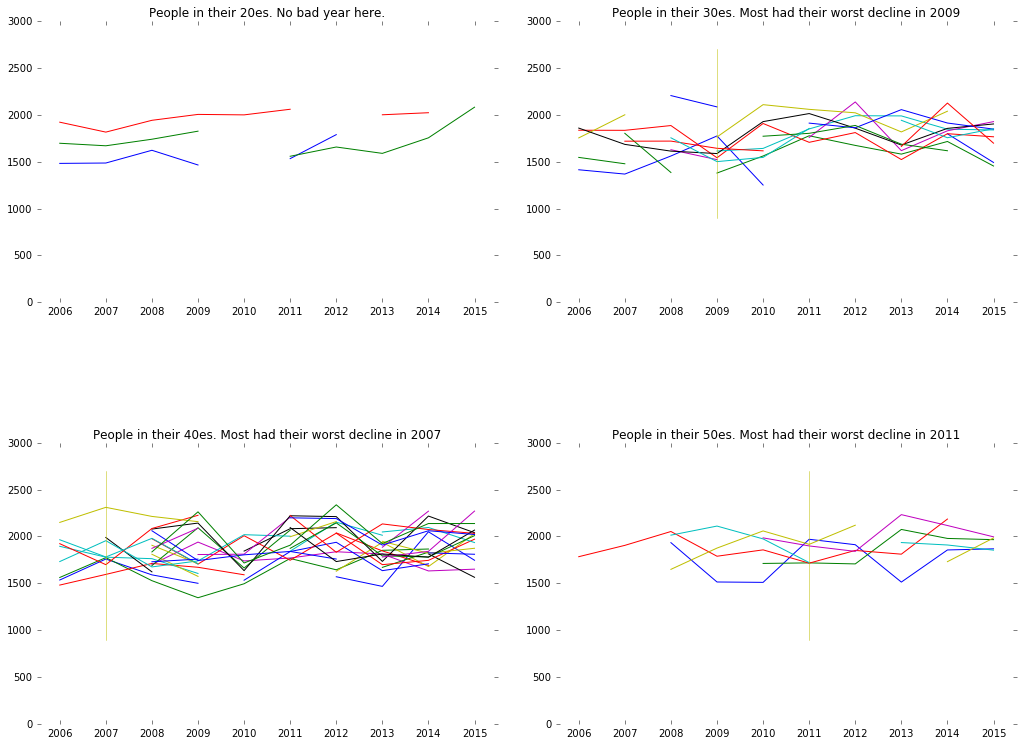

In [375]:
#
#    9. four age groups (18-29, 30-39, 40-49, 50-59)
#

nrows = 2; ncols = 2
num_plots = nrows * ncols  # number of subplots
columns = ['temps s{}'.format(i) for i in range(2006, 2016)]

fig = plt.figure(figsize=(14, 10))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)

colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC', 'red', 'orange', 'green', 'violet']

count = 0

for age_10, group in df[df['nan_values'] < 8].groupby('age_10'):

    ax = axes[count]

    for idx, runner in group.iterrows():
        ax.plot(runner[columns].tolist())
    
    drop_sentence = 'No bad year here.'
    drop_mode = group['sudden_drop_key'].mode()
    if len(drop_mode > 0):
        print(drop_mode[0])
        drop_year = drop_mode[0]
        drop_sentence = 'Most had their worst decline in ' + str(int(drop_year))
        drop_x_tick = drop_year - 2006
        ax.axvline(x=drop_x_tick, ymin=0.3, ymax = 0.9, linewidth=.5, color='y')


#    ax.plot([drop_mode, 0], [drop_mode, 3000], color='k', linestyle='-', linewidth=2)
    #ax.axvline(drop_mode, color='r')
    
    ax.set_title("People in their {}es. {}".format(int(age_10), drop_sentence))

    ax.set_xlim([-.5, 9.5])
    ax.set_ylim([0, 3000])

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
        


    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
    count += 1
    if count > num_plots:
        break

plt.savefig('20-30-40-50.pdf')

In [131]:
# No.

df[df['time_evolution'] == df['time_evolution']]['time_evolution'].describe()
# min      -662.000000
# 25%      -206.000000
# 50%       -21.000000
# 75%       142.000000
# max       670.000000

#df_bad_evolution = df[df['time_evolution'] < -206]['time_evolution']

lower_limit = df[df['time_evolution'] == df['time_evolution']]['time_evolution'].quantile(q=.3)
upper_limit = df[df['time_evolution'] == df['time_evolution']]['time_evolution'].quantile(q=.7)

df_bad_evolution = df[df['time_evolution'] < lower_limit]
df_medium_evolution = df[(df['time_evolution'] >= lower_limit) & (df['time_evolution'] <= upper_limit) ]
df_good_evolution = df[df['time_evolution'] > upper_limit]

In [104]:
df_regulars = df[df['nan_values'] <= 8]
df_very_regulars = df[df['nan_values']<=2]

df_very_regulars.sort_values(by='time_evolution', ascending=False)

,nom,temps net_2006,temps net_2007,temps net_2008,temps net_2009,temps net_2010,temps net_2011,temps net_2012,temps net_2013,temps net_2014,...,temps s2008,temps s2009,temps s2010,temps s2011,temps s2012,temps s2013,temps s2014,temps s2015,nan_values,time_evolution
141,Rizzo Francesco,"25.28,4","25.40,5","25.55,3","27.16,9","24.41,7","27.09,5","27.23,1","28.13,1","27.56,6",...,2053.0,1789.0,1857.0,1715.0,1851.0,1811.0,2186.0,NaN,2,221.0
85,Kleiner Nathaniel,"24.25,8","24.23,1","23.36,1","23.44,7",NaN,"24.11,9","25.15,8","24.15,0","25.25,6",...,1741.0,1827.0,NaN,1559.0,1658.0,1590.0,1756.0,2083.0,2,96.0
308,Widmer Bernard,"27.46,9",NaN,"28.39,9","28.46,3","27.01,5","28.54,1","27.59,2","28.05,4","28.53,8",...,2079.0,2143.0,1635.0,2221.0,2212.0,1734.0,2218.0,2040.0,2,67.0
376,Gay Laurent,"28.24,3","27.07,9","28.40,5","28.54,6",NaN,"28.54,4","28.15,1","28.45,4","29.33,4",...,2085.0,2226.0,NaN,2224.0,1831.0,2134.0,2074.0,2033.0,2,60.0
180,Dumalle Florian,"26.15,7",NaN,"28.29,6","28.02,5","25.50,8","28.06,6","28.35,5","28.01,9","29.00,5",...,1976.0,1705.0,2008.0,1746.0,2035.0,1699.0,1745.0,1971.0,2,-2.0
189,Rondags Daniel,"26.17,2","27.33,5","27.05,5","27.11,9","25.51,9","27.38,3",NaN,"27.42,8","28.41,6",...,1675.0,1739.0,2019.0,2003.0,NaN,2048.0,2096.0,1935.0,2,-35.0
199,Gattone Sylvain,"26.30,0","26.12,6","25.11,4","26.02,8","24.48,9","26.45,5","26.29,9","26.11,9","26.29,7",...,1614.0,1588.0,1929.0,2015.0,1859.0,1679.0,1857.0,1904.0,0,-72.0
90,Gillieron Christophe,"24.32,4",NaN,"23.55,4","25.01,4","23.13,0","25.47,0","25.41,2","25.01,3","25.35,6",...,1934.0,1514.0,1510.0,1970.0,1912.0,1513.0,1856.0,1868.0,2,-95.0
35,Khelifi Mehdi,"22.24,2","21.51,4","21.26,8","22.02,6","20.29,5","21.50,5","21.38,4","21.59,2","22.54,6",...,1528.0,1346.0,1495.0,1765.0,1644.0,1852.0,1866.0,NaN,2,-109.0
68,Dutoit Thierry,"23.45,7","23.45,6","23.50,7","24.10,3","22.58,9","25.20,8","24.37,2","25.02,4","28.12,0",...,1887.0,1543.0,1909.0,1708.0,1812.0,1524.0,1800.0,1767.0,0,-211.0


['2006 -28', '2007 -29', '2008 -30', '2009 -31', '2010 -32', '2011 -33', '2012 -34', '2013 -35', '2014 -36', '2015 -37']


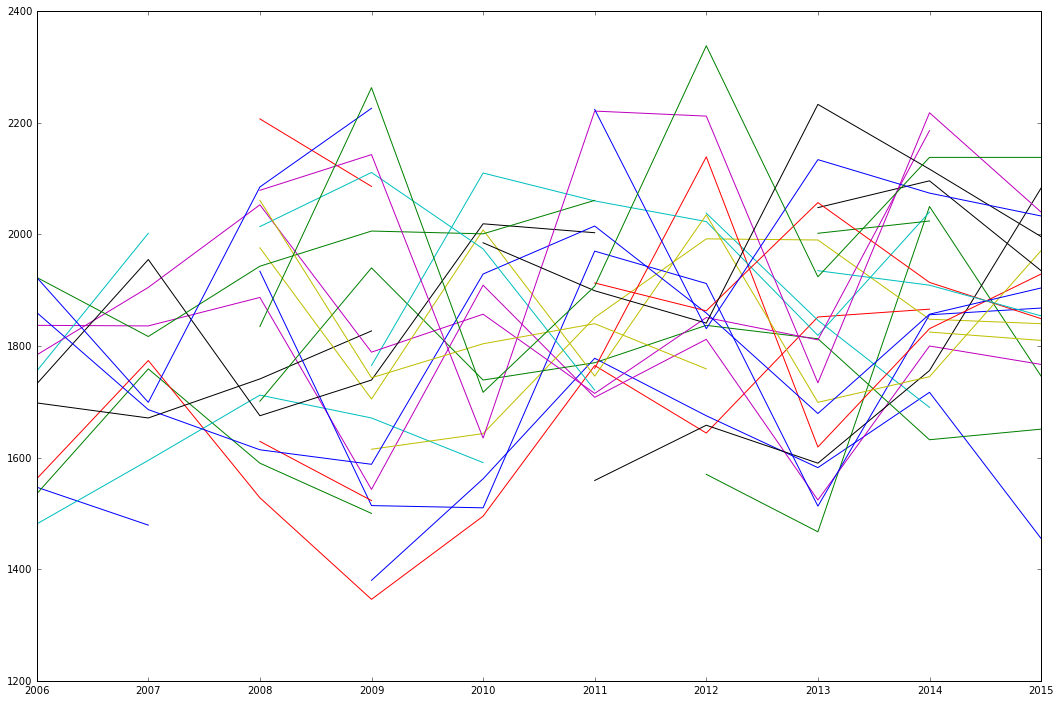

In [70]:
# Useless attempt
#

counter = 0
columns = ['temps net_{}'.format(i) for i in range(2006, 2016)]
xticklabels = ['{} {}'.format(i, 1978-i) for i in years]
print(xticklabels)
fig, ax = plt.subplots(figsize=(18,12))

for idx, runner in df.iterrows():
    runner[columns].plot(label=runner['nom'])

    values = runner[columns].tolist()

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels(range(2006, 2016))
#    ax.legend(loc='best')
    

#    for x, y, year in zip(range(0, 10), values, years):
#        ax.text(x+.1, y+15, "{} y.o.".format(year-runner['Birth']))
    
plt.savefig('very_regulars.pdf')

In [476]:
# For debugging

columns = ['temps s{}'.format(i) for i in range(2006, 2016)]
col_ext = columns
col_ext.append('time_evolution')
df_very_regulars.sort_values(by='time_evolution', ascending=False)[col_ext]

,temps s2006,temps s2007,temps s2008,temps s2009,temps s2010,temps s2011,temps s2012,temps s2013,temps s2014,temps s2015,time_evolution
141,1784.0,1905.0,2053.0,1789.0,1857.0,1715.0,1851.0,1811.0,2186.0,NaN,221.0
85,1698.0,1671.0,1741.0,1827.0,NaN,1559.0,1658.0,1590.0,1756.0,2083.0,96.0
308,2089.0,NaN,2079.0,2143.0,1635.0,2221.0,2212.0,1734.0,2218.0,2040.0,67.0
376,1923.0,1699.0,2085.0,2226.0,NaN,2224.0,1831.0,2134.0,2074.0,2033.0,60.0
180,1717.0,NaN,1976.0,1705.0,2008.0,1746.0,2035.0,1699.0,1745.0,1971.0,-2.0
189,1732.0,1955.0,1675.0,1739.0,2019.0,2003.0,NaN,2048.0,2096.0,1935.0,-35.0
199,1860.0,1686.0,1614.0,1588.0,1929.0,2015.0,1859.0,1679.0,1857.0,1904.0,-72.0
90,1764.0,NaN,1934.0,1514.0,1510.0,1970.0,1912.0,1513.0,1856.0,1868.0,-95.0
35,1562.0,1774.0,1528.0,1346.0,1495.0,1765.0,1644.0,1852.0,1866.0,NaN,-109.0
68,1837.0,1836.0,1887.0,1543.0,1909.0,1708.0,1812.0,1524.0,1800.0,1767.0,-211.0


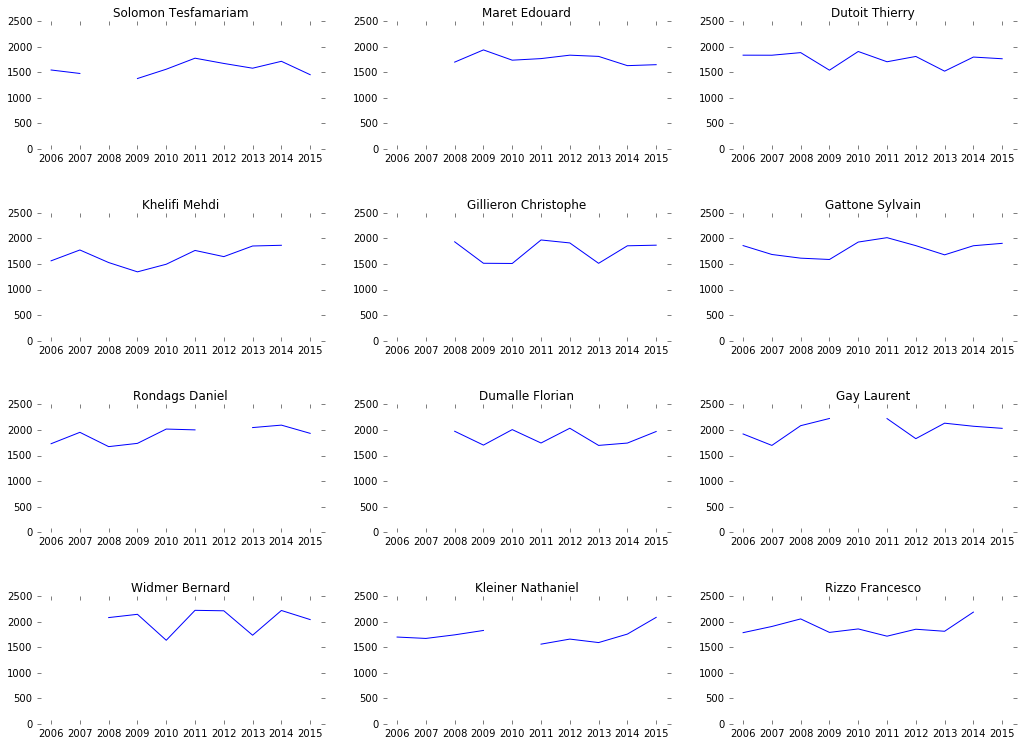

In [488]:
#
#    10. Twelve most regular runners and their evolution, sorted from the better to the worst evolution
#


nrows = 4; ncols = 3
num_plots = nrows * ncols  # number of subplots
columns = ['temps s{}'.format(i) for i in range(2006, 2016)]

fig = plt.figure(figsize=(14, 10))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)

colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC', 'red', 'orange', 'green', 'violet']

count = 0

for idx, runner in df_very_regulars.sort_values(by='time_evolution', ascending=True).iterrows():
    ax = axes[count]

    name = runner['nom']
    values = runner[columns].tolist()
    ax.plot(values)
    ax.set_title(name)

    ax.set_xlim([-.5, 9.5])
    ax.set_ylim([0, 2500])

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
        


    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.set_xticklabels([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
    count += 1
    if count >= num_plots:
        break

plt.savefig('Small_multiples_12runners.pdf')